# PREDICTION DES PERSONNES QUI QUITTERONS LEUR SERVICE DE CARTE DE CREDIT


<h3>Contexte:</h3>
Un responsable d’une banque souhaite réduire le nombre de clients qui quittent leurs services de carte de crédit. Il aimerait pouvoir anticiper le départ des clients afin de leur fournir de meilleurs services et ainsi les retenir.


<h3>Objectif</h3>
Votre travail sera de mettre en place un modèle de Machine Learning capable de prédire les départs des clients. 

La variable cible est `Attrition_Flag`.

Description du jeu de donnée :

| **VARIABLE**             | **DESCRIPTION**                                                      |
|:-------------------------|:---------------------------------------------------------------------|
| CLIENTNUM                | Numéro client. Identifiant unique du client titulaire du compte      |
| Attrition_Flag           | Variable cible (activité client) - si le compte est fermé, 1 sinon 0 |
| Customer_Age             | Âge du client en années                                              |
| Gender                   | Sexe du client (M = Homme, F = Femme)                                |
| Dependent_count          | Nombre de personnes à charge                                         |
| Education_Level          | Niveau d'éducation                                                   |
| Marital_Status           | situation maritale                                                   |
| Income_Category          | Catégorie de revenu annuel                                           |
| Card_Category            | Type de carte                                                        |
| Months_on_book           | Période de relation avec la banque                                   |
| Total_Relationship_Count | Nombre total de produits détenus par le client                       |
| Months_Inactive_12_mon   | Nombre de mois d'inactivité au cours des 12 derniers mois            |
| Contacts_Count_12_mon    | Nombre de contacts au cours des 12 derniers mois                     |
| Credit_Limit             | Limite de crédit sur la carte de crédit                              |
| Total_Revolving_Bal      | Solde renouvelable total sur la carte de crédit                      |
| Avg_Open_To_Buy          | Ligne de crédit ouverte à l'achat (moyenne des 12 derniers mois)     |
| Total_Amt_Chng_Q4_Q1     | Changement du montant de la transaction (T4 par rapport au T1)       |
| Total_Trans_Amt          | Montant total de la transaction (12 derniers mois)                   |
| Total_Trans_Ct           | Nombre total de transactions (12 derniers mois)                      |
| Total_Ct_Chng_Q4_Q1      | Changement du nombre de transactions (T4 par rapport au T1)          |
| Avg_Utilization_Ratio    | Taux d'utilisation moyen de la carte                                 |

In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import learning_curve

from sklearn.ensemble import RandomForestClassifier

import pickle

## Chargement du dataset 

In [38]:
data = pd.read_csv("Dataset.csv", sep=";")
df = data.copy()
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


## ANALYSE EXPLORATOIRE

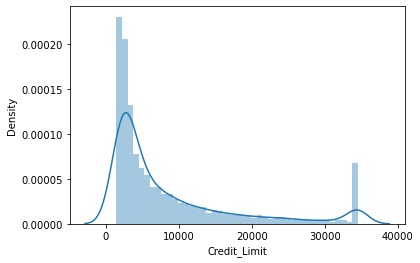

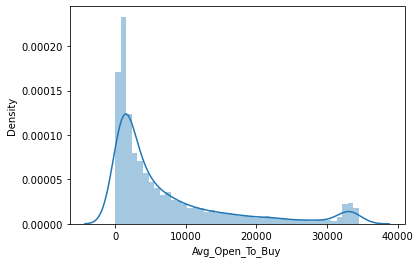

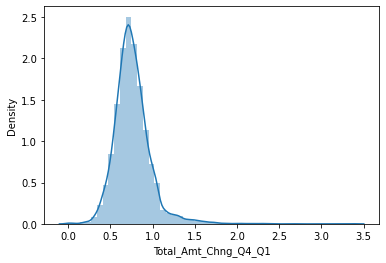

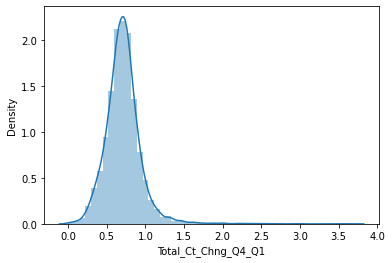

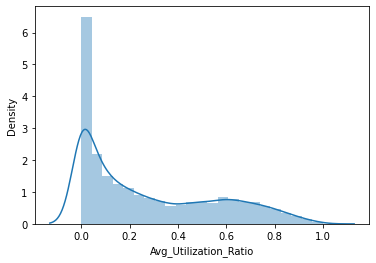

In [39]:
# variables continues
for col in df.select_dtypes(['float']):
    plt.figure()
    sns.distplot(df[col])

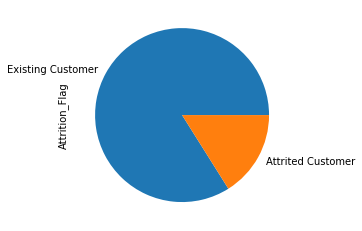

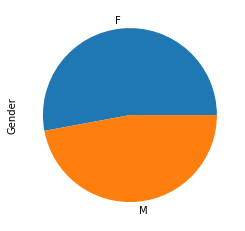

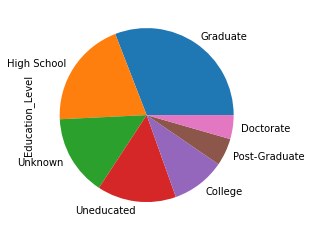

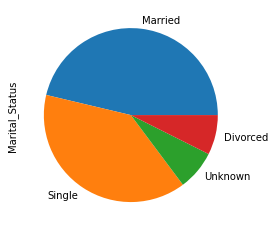

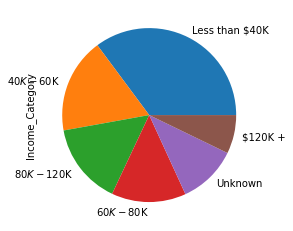

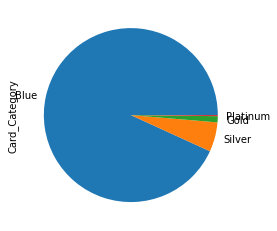

In [40]:
# variables qualitatives
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

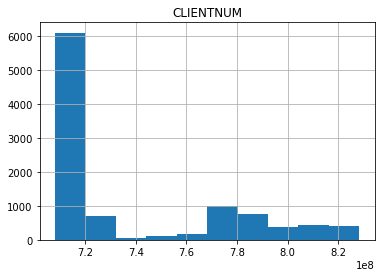

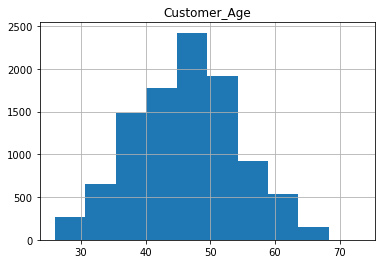

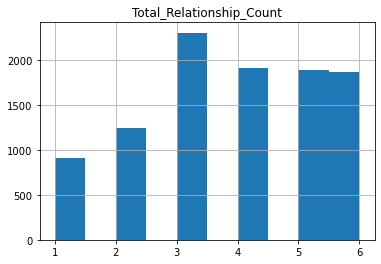

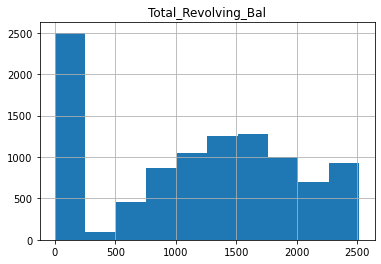

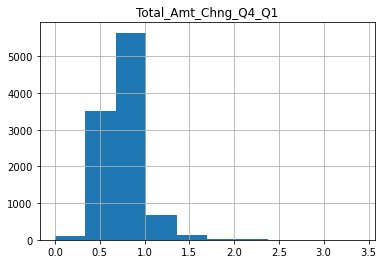

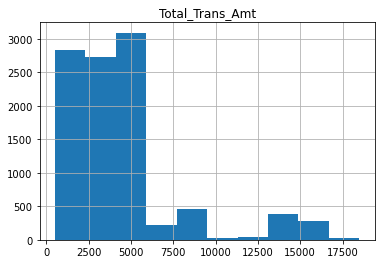

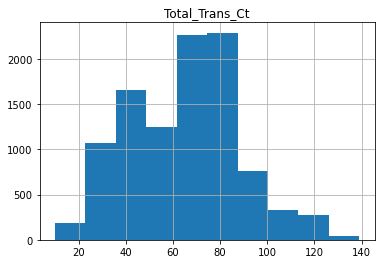

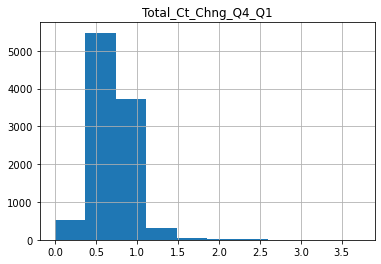

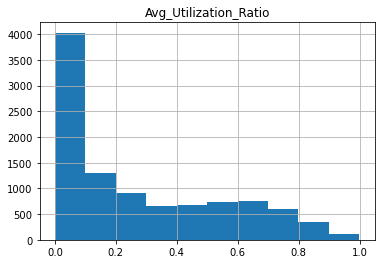

In [50]:
for col in df.select_dtypes(['float', 'int']):
    plt.figure()
    df[col].hist()
    plt.title(col)

## PRE-TRAITEMENT DU DATASET

In [41]:
# les types de variables
pd.set_option('display.max_column', 21)
pd.set_option('display.max_row', 111)
df.dtypes.value_counts()

int64      10
object      6
float64     5
dtype: int64

In [42]:
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


on a 15 colonnes quantitatives et 6 colonnes qualitatives

Il n'y a aucune valeur manquante dans notre dataset, cependant on sait que les valeurs manquantes ont été encodé en `Unknown` donc on va les recoder pour pouvoir les manipuler aisémment

In [43]:
for col in df.select_dtypes(object):
    df[col].replace(['Unknown'], [np.nan], inplace=True)

In [44]:
# identifications des valeurs manquantes
(df.isna().sum()/df.shape[0])*100

CLIENTNUM                    0.000000
Attrition_Flag               0.000000
Customer_Age                 0.000000
Gender                       0.000000
Dependent_count              0.000000
Education_Level             14.999506
Marital_Status               7.396070
Income_Category             10.980547
Card_Category                0.000000
Months_on_book               0.000000
Total_Relationship_Count     0.000000
Months_Inactive_12_mon       0.000000
Contacts_Count_12_mon        0.000000
Credit_Limit                 0.000000
Total_Revolving_Bal          0.000000
Avg_Open_To_Buy              0.000000
Total_Amt_Chng_Q4_Q1         0.000000
Total_Trans_Amt              0.000000
Total_Trans_Ct               0.000000
Total_Ct_Chng_Q4_Q1          0.000000
Avg_Utilization_Ratio        0.000000
dtype: float64

In [45]:
df['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

on constate qu'il y a un desequilibre dans les valeurs de la variable cible environ **83%** des clients founis sont `Existing Customer`

In [47]:
# apres analyse detaillé de preprocessing les colonnes ne nous servirons pas
df.drop(['Card_Category', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Contacts_Count_12_mon', 'Months_Inactive_12_mon', 'Months_on_book', 'Credit_Limit', 'Avg_Open_To_Buy'], axis=1, inplace=True)

In [51]:
# identifications des valeurs manquantes
(df.isna().sum()/df.shape[0])*100

CLIENTNUM                   0.0
Attrition_Flag              0.0
Customer_Age                0.0
Total_Relationship_Count    0.0
Total_Revolving_Bal         0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

In [12]:
# on verifie ce que nous couterais de faire un dropna
df.dropna()
# on supprime la colonne CLIENTNUM qui ne nous servira a rien
del df['CLIENTNUM']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [15]:
trainset['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.837304
Attrited Customer    0.162696
Name: Attrition_Flag, dtype: float64

In [16]:
testset['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.847483
Attrited Customer    0.152517
Name: Attrition_Flag, dtype: float64

In [17]:
for col in df.select_dtypes('object'):
    print(f'{col :<25} {df[col].unique()}')

Attrition_Flag            ['Existing Customer' 'Attrited Customer']


In [18]:
def encodage(df):
    code = {
        'Existing Customer': 1,
        'Attrited Customer': 0,
        'M': 1,
        'F': 0,
        'Uneducated': 0,
        'High School': 1,
        'College': 2,
        'Graduate': 3,
        'Post-Graduate': 4,
        'Doctorate': 5,
        'Single':0,
        'Married': 1,
        'Divorced':2,
        'Less than $40K': 0,
        '$40K - $60K': 1,
        '$60K - $80K': 2,
        '$80K - $120K': 3,
        '$120K +': 4,
        'Blue': 0,
        'Silver': 1,
        'Gold': 2,
        'Platinum': 3
    }

    for col in df.select_dtypes('object'):
        df[col] = df[col].map(code)
    
    return df

In [19]:
def imputation(df):
    return df.dropna(axis=0)

In [20]:
def prepocessing(df):
    df = encodage(df)
    df = imputation(df)
    
    
    X = df.drop('Attrition_Flag', axis=1)
    y = df['Attrition_Flag']
    
    print(y.value_counts(normalize=True))
    
    return X, y

In [21]:
X_train, y_train = prepocessing(trainset)

1    0.837304
0    0.162696
Name: Attrition_Flag, dtype: float64
1    6783
0    1318
Name: Attrition_Flag, dtype: int64


In [22]:
X_test, y_test = prepocessing(testset)

1    0.847483
0    0.152517
Name: Attrition_Flag, dtype: float64
1    1717
0     309
Name: Attrition_Flag, dtype: int64


In [23]:
#sauvegarde du model on the disk
def saveModel(model, name):
    filename = f'creditCard_model{name}.sav'
    pickle.dump(model, open(filename, 'wb'))

In [24]:
def evaluation(model_dict, save=None):
    for key, model in model_dict.items():
        model.fit(X_train, y_train)
        ypred = model.predict(X_test)
        N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4,scoring='f1', train_sizes=np.linspace(0.1, 1, 10))

        plt.figure(figsize=(12,8))
        plt.plot(N, train_score.mean(axis=1), label='train score')
        plt.plot(N, val_score.mean(axis=1), label='validation score') 
        plt.legend()
        plt.title(key)
        
        print(key)
        #print(pd.DataFrame(confusion_matrix(y_test, ypred)))
        plot_confusion_matrix(model, X_test, y_test)  
        plt.show()  
        print(classification_report(y_test, ypred))
        
        if save:
            saveModel(model, name='RFC')

        print(':----------------------------------------------------')

In [25]:
model_list = {
    "Random Forest": RandomForestClassifier(random_state=0)
}

Random Forest


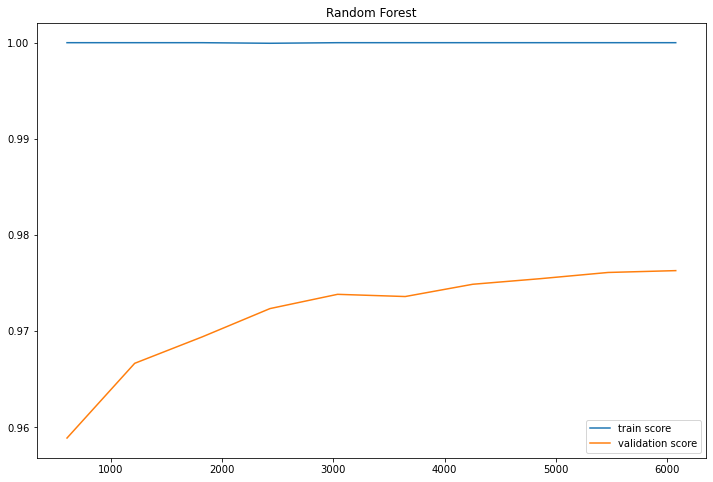

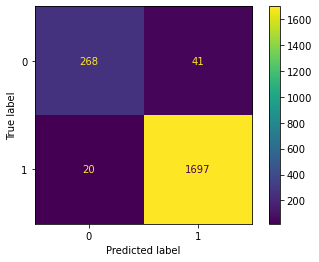

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       309
           1       0.98      0.99      0.98      1717

    accuracy                           0.97      2026
   macro avg       0.95      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026

:----------------------------------------------------


In [26]:
evaluation(model_list, save=True)